<a href="https://colab.research.google.com/github/nishabidla/Google-Colab/blob/main/Digitimage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the pre-trained model (VGG16 in this case)
base_model = tf.keras.applications.VGG16(input_shape=(224, 224, 3),
                                         include_top=False,
                                         weights='imagenet')

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification: medical equipment or not
])


58889256/58889256 [==============================] - 1s 0us/step


In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [5]:
# Load the dataset using flow_from_dataframe
excel_path = '/content/drive/MyDrive/AI/AI.xlsx'
df = pd.read_excel(excel_path)

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(rescale=1./255,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True)


In [6]:
# Convert 'Class' column to strings
df['Class'] = df['Class'].astype(str)

In [7]:
# Set up the generator for training data
train_generator = datagen.flow_from_dataframe(dataframe=df,
                                              directory='/content/drive/MyDrive/AI/',
                                              x_col="Image path",
                                              y_col="Class",
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='binary',
                                              shuffle=True)

Found 8 validated image filenames belonging to 2 classes.


In [8]:
# Train the model
model.fit(train_generator, epochs=10)

Epoch 1/10
1/1 [==============================] - 6s 6s/step - loss: 0.7283 - accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 5s 5s/step - loss: 1.2499 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 6s 6s/step - loss: 1.2282 - accuracy: 0.6250
Epoch 4/10
1/1 [==============================] - 5s 5s/step - loss: 0.2116 - accuracy: 0.7500
Epoch 5/10
1/1 [==============================] - 6s 6s/step - loss: 0.3040 - accuracy: 0.8750
Epoch 6/10
1/1 [==============================] - 5s 5s/step - loss: 0.0766 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 5s 5s/step - loss: 0.0294 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 5s 5s/step - loss: 0.3274 - accuracy: 0.6250
Epoch 9/10
1/1 [==============================] - 6s 6s/step - loss: 0.0046 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 4s 4s/step - loss: 0.1068 - accuracy: 0.8750


In [9]:
# Save the trained model
model.save('/content/drive/MyDrive/medical_equipment_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


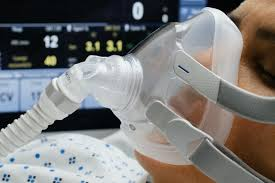

Class: 1


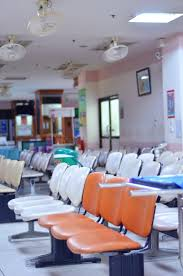

Class: 0


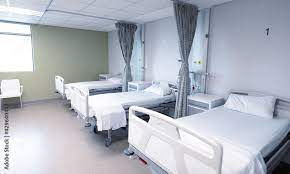

Class: 0


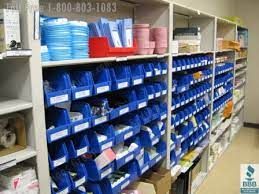

Class: 0


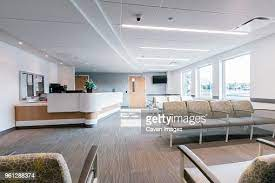

Class: 0


In [10]:
from IPython.display import display, Image

# Display some sample images from your dataset
sample_images = df.sample(5)  # Displaying 5 random images
for index, row in sample_images.iterrows():
    img_path = row['Image path']
    img_class = row['Class']

    # Display the image along with class label
    display(Image(filename=img_path, width=200, height=200))
    print(f"Class: {img_class}")

In [11]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16, MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd




In [12]:
# Load the dataset using flow_from_dataframe
excel_path = '/content/drive/MyDrive/AI/AI.xlsx'
df = pd.read_excel(excel_path)

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(rescale=1./255,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True)


In [15]:

# Convert 'Class' column to strings
df['Class'] = df['Class'].astype(str)

# Set up the generator for training data
train_generator = datagen.flow_from_dataframe(dataframe=df,
                                              directory='/content/drive/MyDrive/AI/',
                                              x_col="Image path",
                                              y_col="Class",
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='binary',
                                              shuffle=True)

# Load VGG16 model
base_model_vgg16 = VGG16(input_shape=(224, 224, 3),
                         include_top=False,
                         weights='imagenet')

# Create a new model using VGG16
model_vgg16 = Sequential([
    base_model_vgg16,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
# Compile the VGG16 model
model_vgg16.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

# Train the VGG16 model
model_vgg16.fit(train_generator, epochs=10)

# Load MobileNetV2 model
base_model_mobilenet = MobileNetV2(input_shape=(224, 224, 3),
                                   include_top=False,
                                   weights='imagenet')

# Create a new model using MobileNetV2
model_mobilenet = Sequential([
    base_model_mobilenet,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the MobileNetV2 model
model_mobilenet.compile(optimizer='adam',
                        loss='binary_crossentropy',
                        metrics=['accuracy'])

# Train the MobileNetV2 model
model_mobilenet.fit(train_generator, epochs=10)

Found 8 validated image filenames belonging to 2 classes.
Epoch 1/10
1/1 [==============================] - 23s 23s/step - loss: 0.7816 - accuracy: 0.3750
Epoch 2/10
1/1 [==============================] - 18s 18s/step - loss: 2.2900 - accuracy: 0.6250
Epoch 3/10
1/1 [==============================] - 23s 23s/step - loss: 13.7870 - accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 20s 20s/step - loss: 0.7409 - accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 18s 18s/step - loss: 0.9570 - accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 19s 19s/step - loss: 0.6951 - accuracy: 0.3750
Epoch 7/10
1/1 [==============================] - 18s 18s/step - loss: 0.7620 - accuracy: 0.5000
Epoch 8/10
1/1 [==============================] - 18s 18s/step - loss: 0.7410 - accuracy: 0.5000
Epoch 9/10
1/1 [==============================] - 19s 19s/step - loss: 0.7666 - accuracy: 0.5000
Epoch 10/10
9406464/9406464 [==============================] - 0s 0u

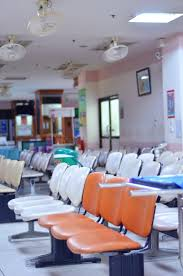

Class: 0


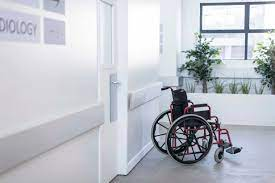

Class: 1


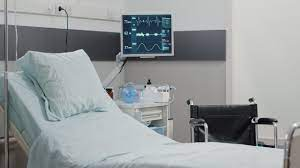

Class: 1


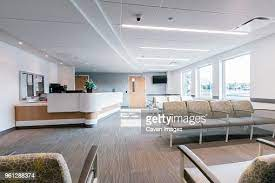

Class: 0


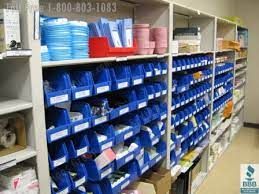

Class: 0


In [16]:
from IPython.display import display, Image
import random

# Function to display sample images
def display_sample_images(model, df, num_images=5):
    # Display some sample images from your dataset
    sample_images = df.sample(num_images)  # Displaying 'num_images' random images

    for index, row in sample_images.iterrows():
        img_path = row['Image path']
        img_class = row['Class']

        # Display the image along with class label
        display(Image(filename=img_path, width=200, height=200))
        print(f"Class: {img_class}")

        # Use the model to make predictions (assuming 'model' is already defined)
        # prediction = model.predict(preprocess_image(img_path))  # Adjust this line based on model input requirements
        # print(f"Model Prediction: {prediction}")

# Display sample images for your model
display_sample_images(model, df)